### Prérecquis : 
- capsule *Configuration du robot*
- capsule *Prise en main d'un notebook Jupyter*
- capsule *Python : les bases*
- capsule *Python : les tableaux ndarrays de numpy*
- capsule *Python : tracé de courbes avec matplotlib*
- capsule *Python Orienté Objet*

### Acquis d'aprentissage visés : 
A l'issue de cette activité l'apprenant saura : 
- utiliser un notebook Jupyter pour faire bouger le robot 
- faire bouger le robot en utilisant TrajectoryRecorder

## Créer une trajectoire 

In [1]:
import time
import cv2 as cv
import numpy as np
import time


from matplotlib import pyplot as plt

In [2]:
from reachy import Reachy, parts 

reachy = Reachy(
    right_arm=parts.RightArm(io='/dev/ttyUSB*', hand='force_gripper'),
    head=parts.Head(io='/dev/ttyUSB*'),
)

Trajectoire point par point pour le bras: 

In [ ]:
for m in reachy.right_arm.motors:
    m.compliant = False

reachy.goto({
    'right_arm.shoulder_pitch': 0,
    'right_arm.shoulder_roll': 0,
    'right_arm.arm_yaw': 0,    
    'right_arm.elbow_pitch': -90,
    'right_arm.hand.forearm_yaw': 0,
    'right_arm.hand.wrist_pitch': 0,
    'right_arm.hand.wrist_roll': 0,
    'right_arm.hand.gripper': 0,
}, duration=3, wait=True)

reachy.goto({
    'right_arm.shoulder_pitch': 0,
    'right_arm.shoulder_roll': 0,
    'right_arm.arm_yaw': 0,    
    'right_arm.elbow_pitch': -90,
    'right_arm.hand.forearm_yaw': 0,
    'right_arm.hand.wrist_pitch': 0,
    'right_arm.hand.wrist_roll': 0,
    'right_arm.hand.gripper': 0,
}, duration=3, wait=True)

reachy.goto({
    'right_arm.shoulder_pitch': 0,
    'right_arm.shoulder_roll': 0,
    'right_arm.arm_yaw': 0,    
    'right_arm.elbow_pitch': -90,
    'right_arm.hand.forearm_yaw': 0,
    'right_arm.hand.wrist_pitch': 0,
    'right_arm.hand.wrist_roll': 0,
    'right_arm.hand.gripper': 0,
}, duration=3, wait=True)

Trajectoire aléatoire pour la tête : 

In [5]:
reachy.head.compliant = True

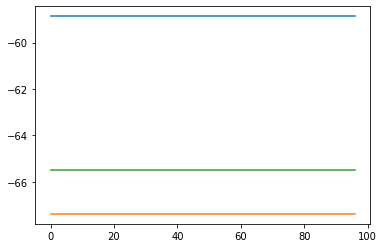

In [6]:
x = 0.5
y = (2 * np.random.rand() - 1) * 0.25
z = (2 * np.random.rand() - 1) * 0.25

duration = 1

reachy.head.look_at(x, y, z, duration=duration, wait=False)

real = []

t0 = time.time()
while time.time() - t0 < duration:
    real.append([d.rot_position for d in reachy.head.neck.disks])
    time.sleep(0.01)
    
plt.figure()
plt.plot(real)

Trajectoire qui suit une courbe sinus pour les antennes : 

In [3]:
for m in reachy.head.motors:
    m.compliant = False
    
t = np.linspace(0, 10, 1000)
pos = 30 * np.sin(2 * np.pi * 0.5 * t)

for p in pos:
    for m in reachy.head.motors:
        m.goal_position = p
    time.sleep(0.01)

## A toi de jouer ! 

Créer ta propre trajectoire pour Nemo 

Scénarios ? 